<a href="https://colab.research.google.com/github/Henrymelendez/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
# Your Work Here
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 


In [286]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [0]:
url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv'
plt.style.use('fivethirtyeight')

In [288]:
df = pd.read_csv(url)
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [289]:
df['timestamp'].tail()

80048    2017-08-29 23:10:05.369510
80049    2017-08-29 23:10:05.598331
80050    2017-08-29 23:10:05.794141
80051    2017-08-29 23:10:06.022268
80052    2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [290]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace = True)
lastday = df['2017-08-29']
last_day_filtered = lastday[lastday['category']== 'IMDb users']
last_day_filtered

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 00:00:06.288486,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:10:06.763461,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:20:05.745307,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:30:05.818552,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
2017-08-29 00:40:06.180928,2646,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1020,67,39,24,55,107,152,145,144,893,38.5,2.5,1.5,0.9,2.1,4.0,5.7,5.5,5.4,33.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [291]:
final = last_day_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [292]:
final = final[final.columns[16:]]
final

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,
2017-08-29 23:10:06.218251,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [293]:
plot_data = final.T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


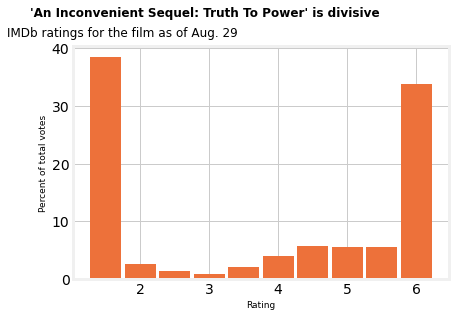

In [294]:
fig,ax = plt.subplots()

# Background Color 
fig.patch.set(facecolor= 'white')

#Set the bars 
ax.bar(x=range(1,11),height = plot_data['percent'],width = 0.9, color= '#ED713A')

#Axes background Color
ax.set(facecolor='white')

#set title and subtitle 
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive",
             fontsize= 12,
             x=0.35, y=1.1,
             fontweight= 'bold')
ax.text(s='IMDb ratings for the film as of Aug. 29', fontsize = 12 , x=-1.85, y=42);

ax.set_xlabel('Rating', fontsize = 9)
ax.set_ylabel('Percent of total votes', fontsize=9)

#fix the x an y axis tick marks and grid 
ax.set_xticklabels(range(1,11), rotation = 0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [295]:
from google.colab import files
files.upload()


Saving sleeping-alone-data.zip to sleeping-alone-data (7).zip


{'sleeping-alone-data.zip': b'PK\x03\x04\n\x00\x00\x00\x00\x00\x84rIL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x14\x00\x1c\x00sleeping-alone-data/UT\t\x00\x03h\xf4}Z\x11fs^ux\x0b\x00\x01\x04\xe8\x03\x00\x00\x04\xe8\x03\x00\x00PK\x03\x04\x14\x00\x00\x00\x08\x00\x86\x84FLy\xca\xc9M\xe2V\x00\x00`\xb7\x04\x00+\x00\x1c\x00sleeping-alone-data/sleeping-alone-data.csvUT\t\x00\x03\xcb\x1fzZ\xf5\xfer^ux\x0b\x00\x01\x04\xe8\x03\x00\x00\x04\xe8\x03\x00\x00\xed}\xfdr\xdbH\x92\xe7\x13\xec;\xe0\x14\x1373qt7\xbf\xf4\xe5\x8d\xd8\r\x8f\xdb\xee\xf6\x86\xe5V\xb4z\xb6\xef\xfe\xba\xa0IH\xc25E\xe8\x08\xd0j=\xf3\xbd\xc4U\x81\xa4\x88\x02+\xab2\xb3\xb2\x00hv\x18\xb1;-\x99"\x0bUY\xf9\xf9\xcb_\xde\x94\xb3u\xf9\xc3\xacL\x07\x1fV\x8b\xea\x7f\x7f\xbb\xcf\xe6\xf7I~\x9b\x94\xf7ir\x9b/\x97\xf9S\xb6\xbaK\xbe\xa6E\x99,\xd2b\xbe\xce\xd4\x7f&\xcf\xf9f\x9d\xcc7\xebu\xba*\x93u\xba\x9c\x95Y\xbe*\xee\xb3\xc7\xa4(g\xe5\xa6\xf8\xf7\xc1\xc9O\xf9S\xb2\xcc\xd5\x9f\xde\xcf\xbe\xa5\xfa\x0f\xd4g\xa4\xab$[\xc1\x7f\xfc\xef\xc9\xa

In [296]:
!unzip sleeping-alone-data.zip

Archive:  sleeping-alone-data.zip
replace sleeping-alone-data/sleeping-alone-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sleeping-alone-data/sleeping-alone-data.csv  
replace sleeping-alone-data/README.md? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sleeping-alone-data/README.md  


In [0]:
df= pd.read_csv('/content/sleeping-alone-data/sleeping-alone-data.csv',encoding="ISO-8859-1", skiprows=1)

In [298]:
df.head(3)

,Unnamed: 0,Response,Response.1,Response.2,Response.3,Other (please specify),Response.4,Other (please specify).1,One of us snores,One of us makes frequent bathroom trips in the night,One of us is sick,We are no longer physically intimate,We have different temperature preferences for the room,We've had an argument or fight,Not enough space,Do not want to share the covers,One of us needs to sleep with a child,Night working/very different sleeping times,Other (please specify).2,Response.5,Response.6,Response.7,Response.8,Response.9,Other (please specify).3,Response.10,Response.11,Response.12,Response.13,Response.14
7/10/14 18:37,7/10/14 18:39,"Single, but cohabiting with a significant other",1-5 years,Once a year or less,On the couch/chair,NaN,"My partner sleeps in our shared bed, I'm the o...",NaN,NaN,NaN,One of us is sick,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),Within the first 1-5 years of our relationship,Strongly disagree,Somewhat agree,Strongly disagree,Other (please specify),Student,Male,18-29,"$0 - $24,999",Some college or Associate degree,Pacific
7/10/14 15:54,7/10/14 15:56,"Single, but cohabiting with a significant other",1-5 years,A few times per month,"I sleep in our shared bed, my partner is the o...",NaN,Separate bedroom,NaN,One of us snores,One of us makes frequent bathroom trips in the...,One of us is sick,NaN,NaN,We've had an argument or fight,NaN,Do not want to share the covers,NaN,NaN,NaN,Immediately/ We've always slept in separate beds,Somewhat agree,Strongly agree,Strongly disagree,Healthcare Support Occupations,NaN,Male,18-29,NaN,Bachelor degree,South Atlantic
7/10/14 15:44,7/10/14 15:49,Married,1-5 years,Never,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Legal Occupations,NaN,Male,18-29,"$150,000+",Graduate degree,South Atlantic


In [0]:
df = df.rename(columns={'Unnamed: 0' : 'date'})


In [0]:
pd.to_datetime(df['date'])
plt.style.use('fivethirtyeight')
df.set_index(df['Response.2'])
sorter ={'Every night','A few times per week','A few times per month', 'Once a month or less', 'Once a year or less','Never'}



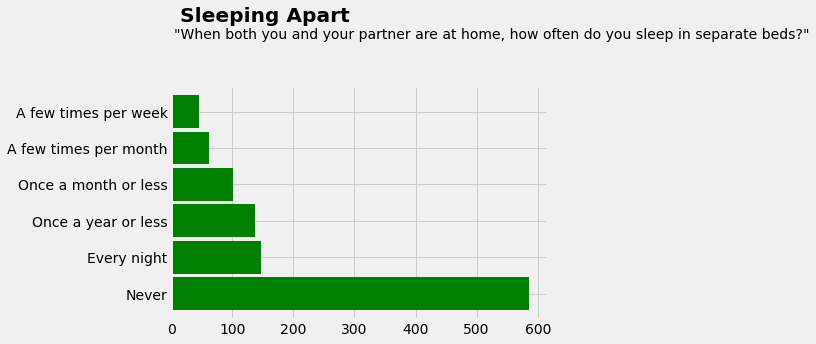

In [412]:
df['Response.2'].value_counts().sort_values(ascending=False).plot(kind= 'barh',color='green', width=0.9);
plt.title('Sleeping Apart', fontweight = 'bold', x=.25, y=1.25);
plt.text(x =5,y=7, s='"When both you and your partner are at home, how often do you sleep in separate beds?"');



In [409]:
from IPython.display import display, Image

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2014/07/chalabi-datalab-sleep-one1.png?w=575'

example = Image (url=url1, width = 400)
display(example)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here